# Data Analysis in Bigmart Sales Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('sales.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


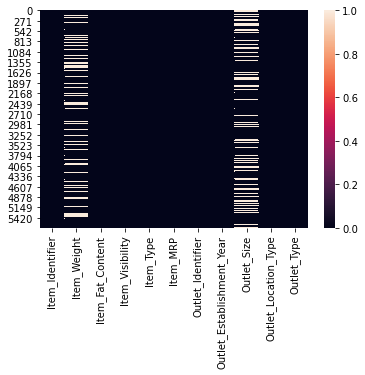

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
len(df['Item_Identifier'].value_counts())

1543

In [7]:
df.shape

(5681, 11)

In [8]:
df['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

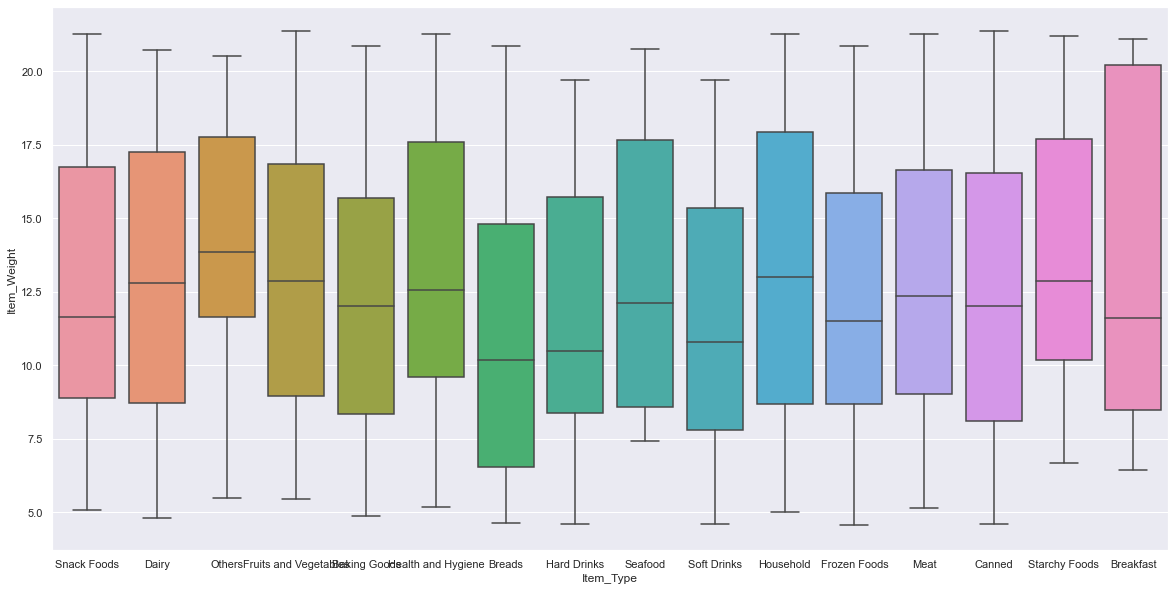

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot('Item_Type','Item_Weight',data=df)


We can use the mean value of each category of item type to replace the missing values in item weight.

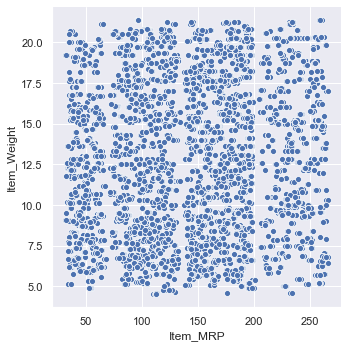

In [10]:
sns.relplot('Item_MRP','Item_Weight',data=df,kind='scatter')

In [11]:
df['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [12]:
def impute_weight(cols):
    Item_Weight=cols[0]
    Item_Type=cols[1]
    
    if pd.isnull(Item_Weight):
        
         if Item_Type=='Snack Foods':
            return 11.8
        
         if Item_Type=='Dairy':
            return 12.7
        
         if Item_Type=='Others':
            return 13.5
        
         if Item_Type=='Fruits and Vegetables':
            return 12.8
        
         if Item_Type=='Baking Goods':
            return 12.3
        
         if Item_Type=='Health and Hygiene':
            return 12.5
        
         if Item_Type=='Breads':
            return 10.1
        
         if Item_Type=='Hard Drinks':
            return 10.2
        
         if Item_Type=='Seafood':
            return 12.3
        
         if Item_Type=='Soft Drinks':
            return 11
        
         if Item_Type=='Household':
            return 12.7
        
         if Item_Type=='Frozen Foods':
            return 11.5
        
         if Item_Type=='Meat':
            return 12.5
        
         if Item_Type=='Canned':
            return 12.2
        
         if Item_Type=='Starchy Foods':
            return 12.7
        
         if Item_Type=='Breakfast':
            return 12
        
        
        
    else:
        
        return Item_Weight

In [13]:
df['Item_Weight']=df[['Item_Weight','Item_Type']].apply(impute_weight,axis=1)

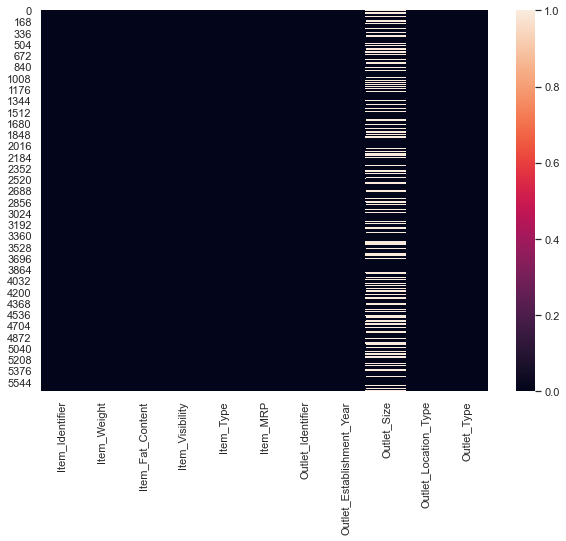

In [14]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.isnull())

Item_Weight is correctly replaced by the mean of each item type of its respective category.

In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
df['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [17]:
df['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [18]:
df['Outlet_Type'].replace(to_replace='Supermarket Type1',value=1,inplace=True)
df['Outlet_Type'].replace(to_replace='Grocery Store',value=2,inplace=True)
df['Outlet_Type'].replace(to_replace='Supermarket Type3',value=3,inplace=True)
df['Outlet_Type'].replace(to_replace='Supermarket Type2',value=4,inplace=True)

In [19]:
df['Outlet_Type'].value_counts()

1    3717
2     722
3     624
4     618
Name: Outlet_Type, dtype: int64

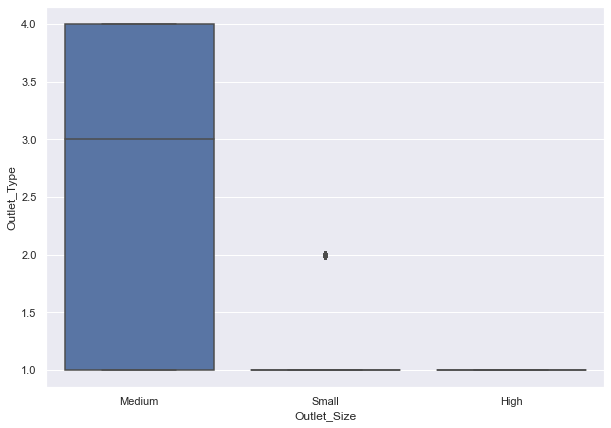

In [20]:
sns.boxplot('Outlet_Size','Outlet_Type',data=df)

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,2
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,1
4,FDY38,12.700,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,3


In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [23]:
df['Item_Fat_Content'].replace(to_replace=['LF','low fat'],value='Low Fat',inplace=True)

In [24]:
df['Item_Fat_Content'].replace(to_replace='reg',value='Regular',inplace=True)

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [26]:
df['Outlet_Establishment_Year'].value_counts()

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

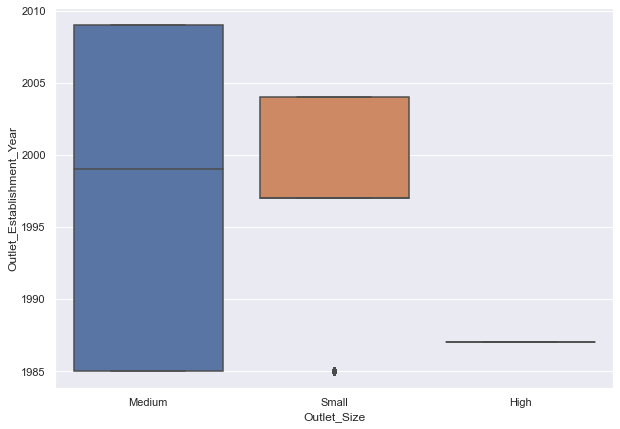

In [27]:
sns.boxplot('Outlet_Size','Outlet_Establishment_Year',data=df)

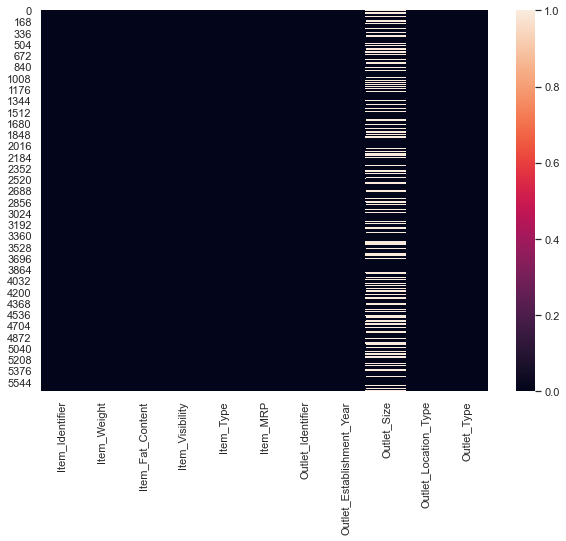

In [28]:
sns.heatmap(df.isnull())
plt.show()

lets delete the outlet_size column


In [29]:
df.drop('Outlet_Size',axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Tier 1,1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Tier 2,1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Tier 3,2
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Tier 2,1
4,FDY38,12.700,Regular,0.118599,Dairy,234.2300,OUT027,1985,Tier 3,3
...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Tier 1,1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Tier 3,4
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Tier 2,1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Tier 2,1


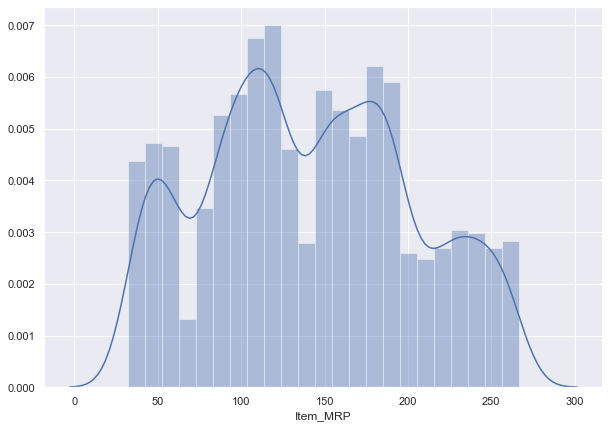

In [35]:
sns.distplot(df['Item_MRP'])
plt.show()

In [36]:
df['Item_MRP'].describe()

count    5681.000000
mean      141.023273
std        61.809091
min        31.990000
25%        94.412000
50%       141.415400
75%       186.026600
max       266.588400
Name: Item_MRP, dtype: float64

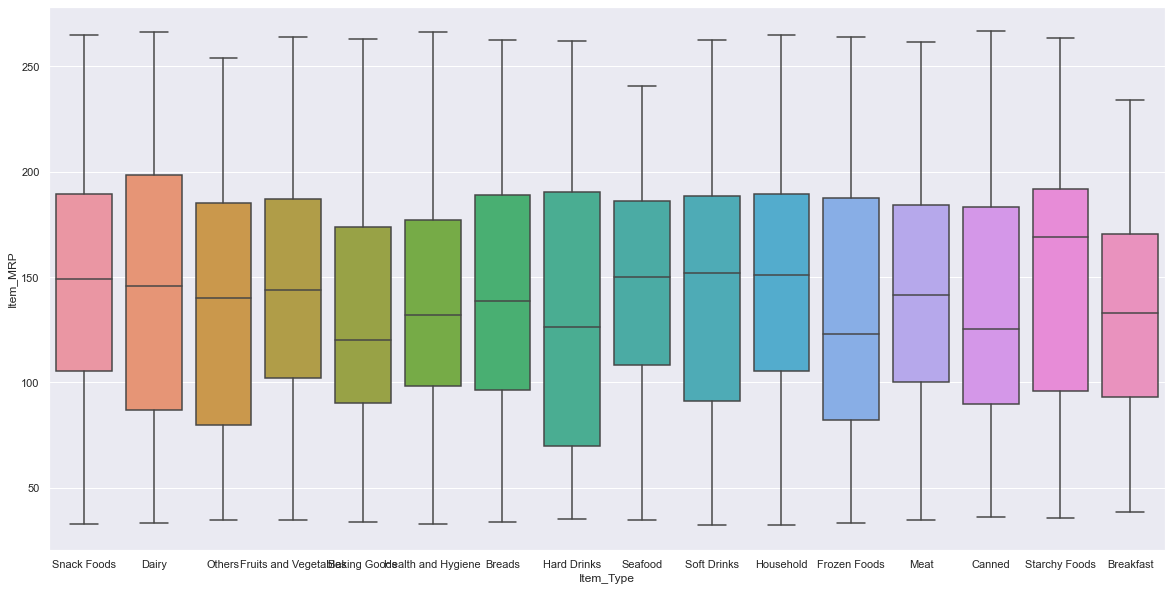

In [46]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot('Item_Type','Item_MRP',data=df)
plt.show()

Starchy foods averagely have highest price  ,  
Baking Goods have lower price

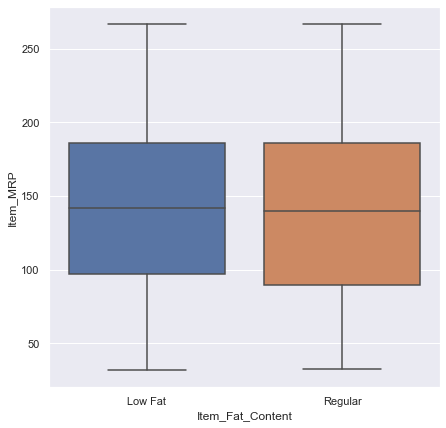

In [51]:
sns.set(rc={'figure.figsize':(7,7)})
sns.boxplot('Item_Fat_Content','Item_MRP',data=df)
plt.show()

Both Fatty and regular foods have nearly same mean price

In [55]:
df['Item_Identifier'].value_counts().head(20)

NCS41    8
FDN52    8
FDW10    8
FDQ60    8
FDP15    8
DRF48    8
FDK57    8
FDZ50    8
NCR42    7
FDE39    7
FDR13    7
FDE21    7
NCU29    7
FDU48    7
NCM18    7
FDI36    7
FDE38    7
FDF28    7
FDW58    7
FDS08    7
Name: Item_Identifier, dtype: int64